In [1]:
import numpy as np 
import random
from utils import *
from rbm import *
from principal_DBN_alpha import *
from rbm import generer_donnees_synthetiques
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

## Load & plot Data

In [2]:
file_path = "data//binaryalphadigs.mat"  # Remplacez par le chemin complet de votre fichier
data = scipy.io.loadmat(file_path)

dat = data['dat'] # dat contient les images
labels = data['classlabels'] 
# transformer dat en un tableau numpy
nb_classes = dat.shape[0]
nb_samples = dat.shape[1]
pixel_i = dat[0][0].shape[0]
pixel_j = dat[0][0].shape[1]
nb_pixels = dat[0][0].shape[0] * dat[0][0].shape[1]

dat_ = [dat[i][j] for i in range(nb_classes) for j in range(nb_samples)]
dat_ = np.array(dat_)
dat_ = dat_.reshape(nb_classes * nb_samples,nb_pixels) # 320 = nombre de pixels dans une image


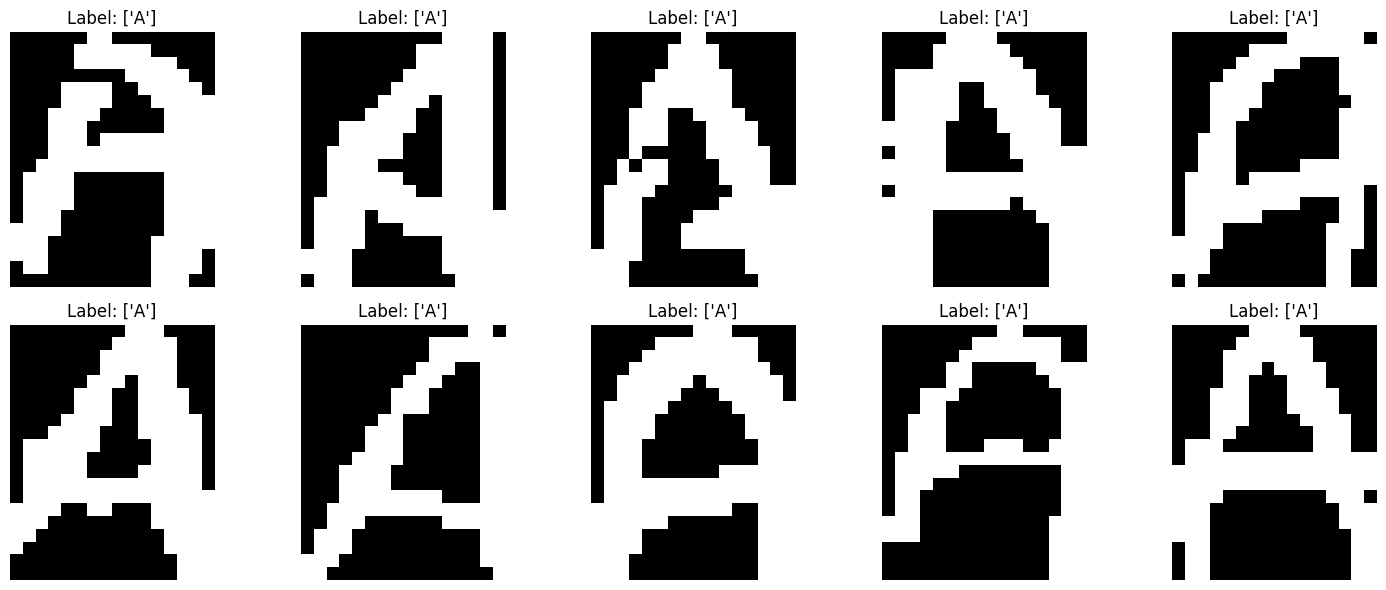

In [3]:
# Créer une figure pour afficher les images
plt.figure(figsize=(15, 6))
random_indices = []
for sample_idx in range(10):
    image_sample = dat[10][sample_idx]  # Accéder à l'échantillon
    label = labels[0][10]  # Récupérer l'étiquette associée
    
    # Afficher chaque image
    plt.subplot(2, 5, sample_idx + 1)
    plt.imshow(image_sample, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [9]:
# print(dat_.shape)
# # reshape dat en 1404,320
X = lire_alpha_digit(data, [10, 11])
X.shape

(78, 320)

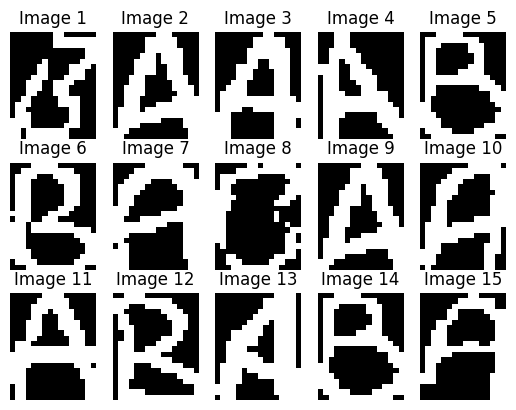

In [21]:
size_img = (pixel_i, pixel_j)
# Afficher quelques images
idx = np.random.choice(X.shape[0], 15)
display_images(X[idx], size_img)

## RBM sur Binary AlphaDigits 

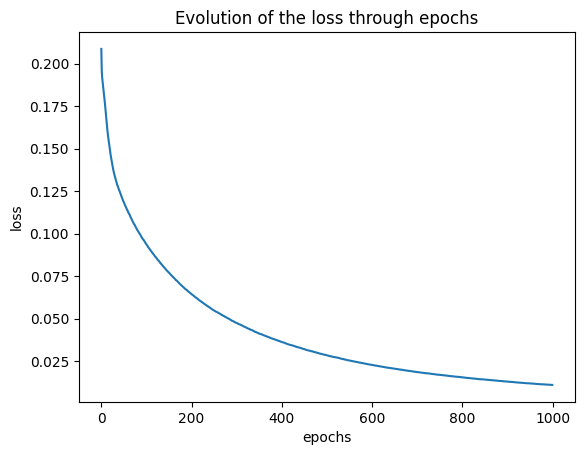

In [22]:
# Initialisation du RBM
rbm = RBM(n_visible=nb_pixels, n_hidden=100)
# Entraînement du RBM
rbm.train(X, epochs=1000, batch_size=10, learning_rate=0.01)

Génération de caractères
15


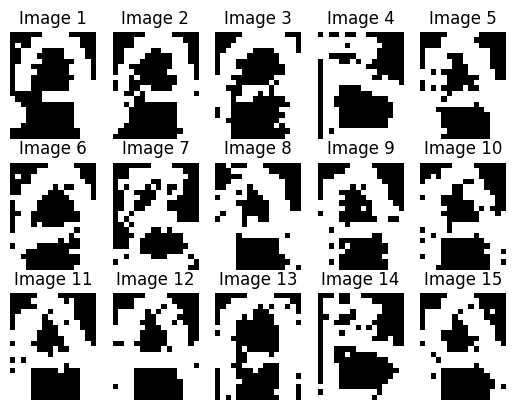

In [23]:
print("Génération de caractères")
n_images = 15
size_img = (pixel_i, pixel_j)
generated_images = rbm.generer_donnees(n_iter=5000, n_images=n_images)

# Afficher les images générées
display_images(generated_images, size_img)

print(len(generated_images))

## DBN sur Binary AlphaDigits 

Entraînement du DBN...
Training RBM with 320 visible and 128 hidden units...


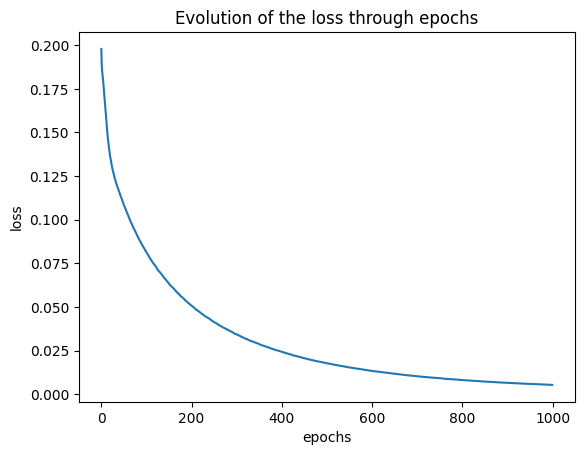

Training RBM with 128 visible and 64 hidden units...


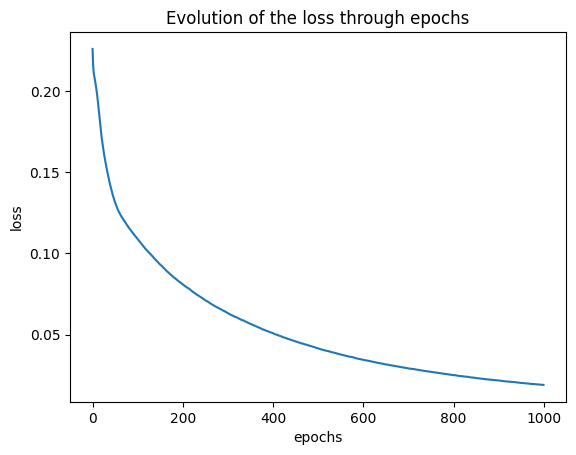

In [25]:
# Initialiser la DBN
layer_sizes = [nb_pixels, 128, 64]  # 320 = 20*16 pixels d'entrée, couches cachées de 128 et 64
dbn = DBN_alpha(layer_sizes)

# Entraîner la DBN
print("Entraînement du DBN...")
dbn.train_DBN(X, epochs=1000, batch_size=10, learning_rate=0.01)

Génération de caractères


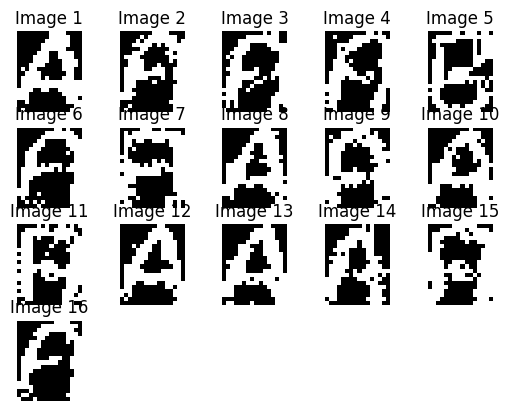

In [28]:
print("Génération de caractères")
n_images = 16
generated_images = dbn.generate_multiple_images(n_iter=500, n_images=n_images)

# Afficher les images générées
display_images(generated_images, size_img)